### This script contains the following:

#### 1. Importing libraries and data
#### 2. Calculation and visualization of correlation


In [2]:
##01 Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
##02 Checking current version of library
matplotlib.__version__

'3.5.2'

In [4]:
##03 This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
##04 Defining "path" as a shortcut to the main Instacart folder on my desktop
path = r'/Users/emmawilcox/Desktop'

In [6]:
##05 Defining "vars_list" as consisting of only columns needed
vars_list = ['nights', 'numberofpeople', 'distance', 'totalbeforetax']

In [7]:
##06 Importing vars_list using the path shortcut
df = pd.read_csv(os.path.join(path, 'camper_grouped_distance.csv'), usecols = vars_list)

In [8]:
##07 Confirming shape of df
df.shape

(1692421, 4)

In [9]:
##08 Confirming desired columns are present
df.head()

,totalbeforetax,nights,numberofpeople,distance
0,258.0,5,12,122.820784
1,108.0,2,4,56.785258
2,108.0,2,12,103.583200
3,58.0,1,6,809.033807
4,158.0,3,12,71.057958


In [10]:
## 09 Looking at dtypes
df.dtypes

totalbeforetax    float64
nights              int64
numberofpeople      int64
distance          float64
dtype: object

#### 2. Calculation and visualization of correlation

In [11]:
## 10 Using .corr to generate a correlation table
df.corr()

,totalbeforetax,nights,numberofpeople,distance
totalbeforetax,1.000000,0.603651,0.207694,-0.061236
nights,0.603651,1.000000,0.004388,-0.106516
numberofpeople,0.207694,0.004388,1.000000,-0.103846
distance,-0.061236,-0.106516,-0.103846,1.000000


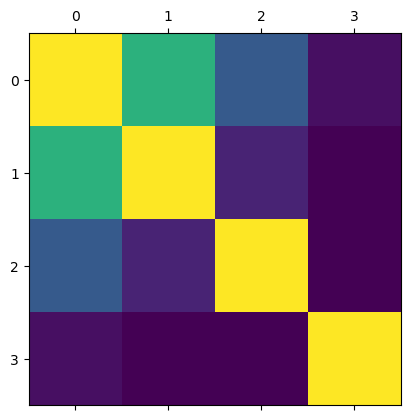

In [12]:
## 11 Making a basic plot
plt.matshow(df.corr())
plt.show()

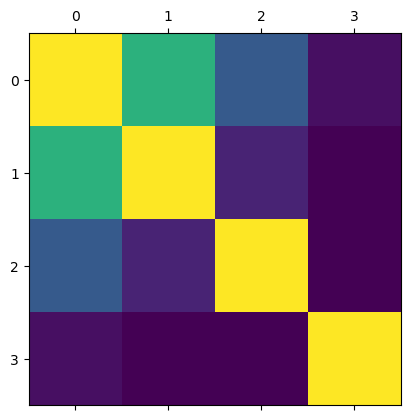

In [13]:
## 12 Saving figure in working directory
plt.matshow(df.corr())
plt.savefig("out.png") 



In [14]:
## 13 This is the current directory

cwd = os.getcwd()
cwd

'/Users/emmawilcox/Desktop'

Text(0.5, 1.0, 'Correlation Matrix')

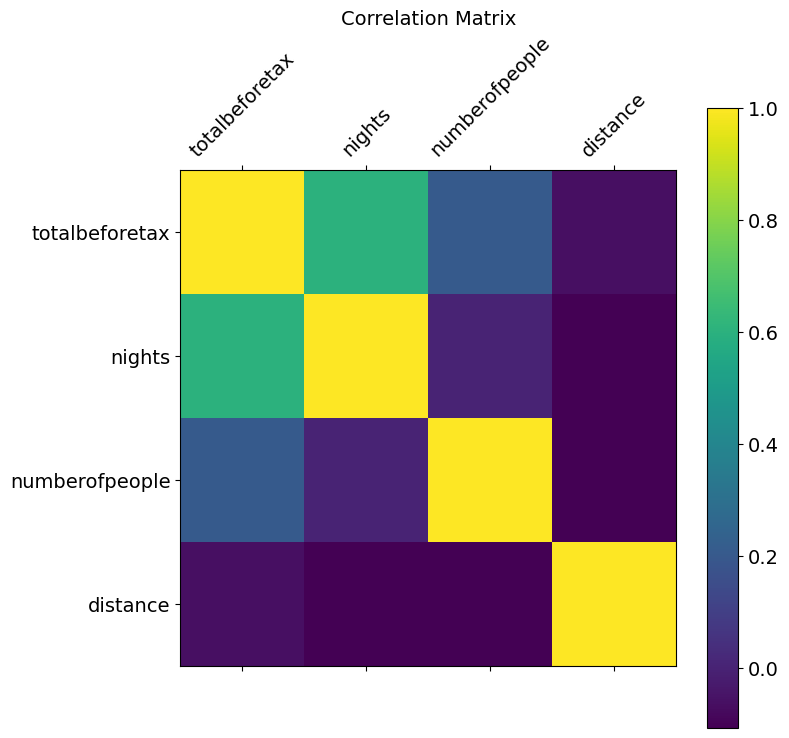

In [15]:
## 14 Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [16]:
##15 Creating a subset

sub = df[['nights', 'numberofpeople', 'distance', 'totalbeforetax']]

In [17]:
sub

,nights,numberofpeople,distance,totalbeforetax
0,5,12,122.820784,258.0
1,2,4,56.785258,108.0
2,2,12,103.583200,108.0
3,1,6,809.033807,58.0
4,3,12,71.057958,158.0
...,...,...,...,...
1692416,1,2,1028.595532,18.0
1692417,1,4,0.000000,18.0
1692418,14,4,1505.218203,18.0
1692419,3,3,2126.997643,38.0


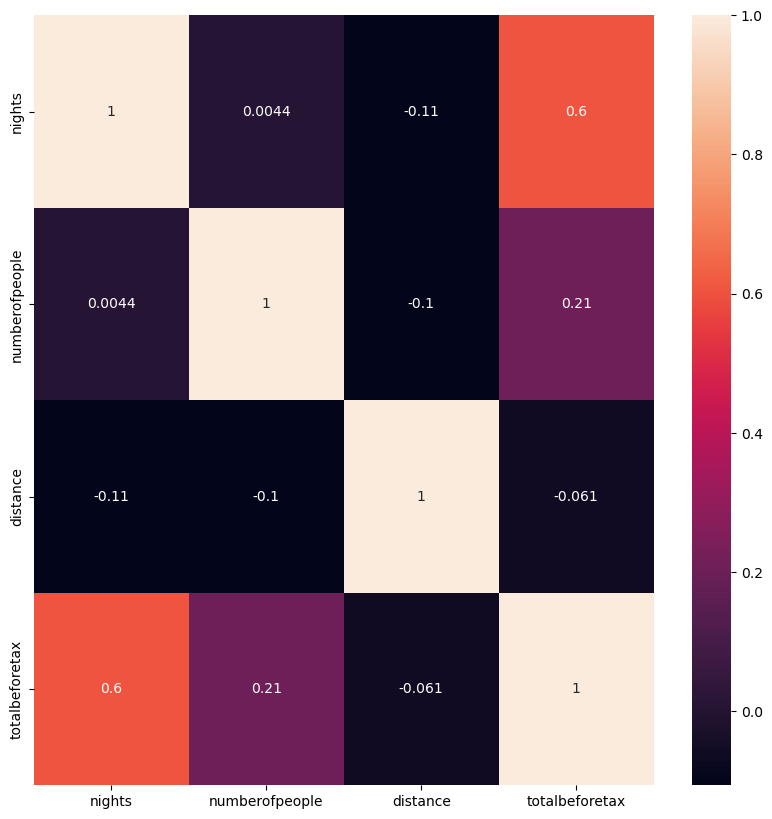

In [18]:
## 16 Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

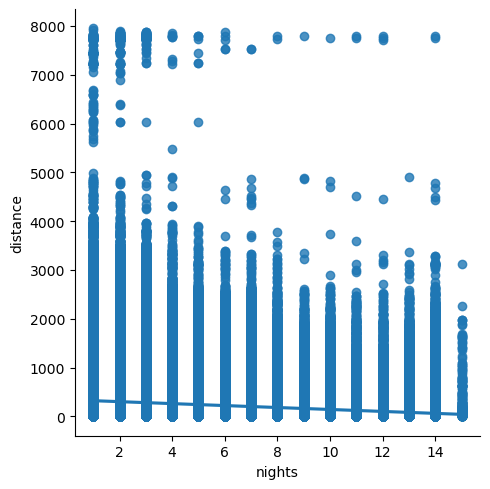

In [19]:
## 17 Create a scatterplot for the "nights" and "distance" columns in seaborn

sns.lmplot(x = 'nights', y = 'distance', data = df)

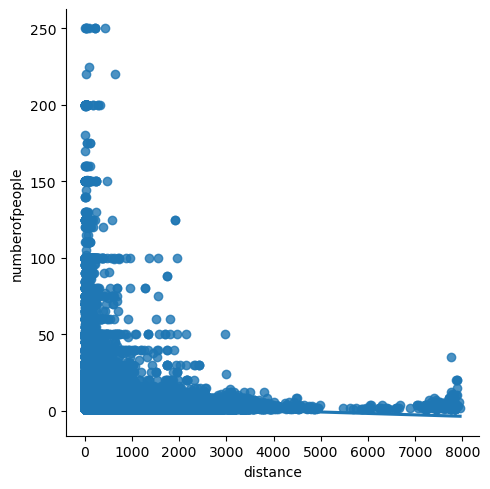

In [15]:
## 18 Create a scatterplot for the "distance" and "numberofpeople" columns in seaborn
sns.lmplot(x = 'distance', y = 'numberofpeople', data = df)

In [1]:
## 19 Creating a Pairplot for the 4 variables
g = sns.pairplot(sub)

NameError: name 'sns' is not defined

In [ ]:
## 20 Creating a categorical scatterplot 
sns.set(style="ticks")
g = sns.catplot(x="numberofpeople", y="nights", hue="distance", data=df)

In [ ]:
## 21 Sorting correlations by strength
# List of numbers
numbers = [-0.061, -0.11, -0.1]

# Define a custom key function to calculate the absolute difference from -1
def key_function(number):
    return abs(number - (-1))

# Sort the numbers based on their closeness to -1
sorted_numbers = sorted(numbers, key=key_function)

# Print the sorted numbers
print("Numbers sorted based on closeness to -1:")
print(sorted_numbers)